In [1]:
import ROOT
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 2002;")
import efficiency as e
from settings import COLORS, DESCRIPTION

Welcome to JupyROOT 6.14/04


In [45]:
import importlib    # This command makes sure we load the last version of the module
importlib.reload(e) # No need to restart the kernel after modifications
p_preliminary = ROOT.TPaveText(-0.1, 0.92, 0.7,0.96, "NDC")
p_preliminary.SetFillStyle(0)
p_preliminary.SetBorderSize(0)
pot = 4.341e10
p_preliminary.AddText("MicroBooNE Simulation Preliminary")

In [46]:
effs_mc = e.bkg_efficiency("data_files/mc_bnb/", 1)

In [4]:
effs_nue = e.bkg_efficiency_nue("data_files/mc_nue_sbnfit/", 1)

1 51356.051542282104
Cosmic 489.43166004121304
3 10905.984449386597
Beam Intrinsic #nu_{#mu} 475.46261525154114
4 3532.753451347351
Beam Intrinsic NC 307.8403123617172
5 36634.57318305969
Outside fid. vol. 81.42774137854576
7 14706.39779663086
Cosmic contaminated 376.0961044977885
8 33.8180891557555
#nu_{e} CC 13.689685006185696


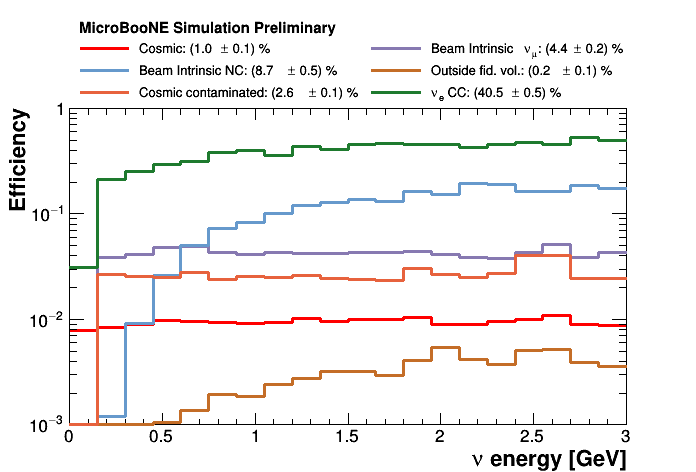

In [44]:
c_eff = ROOT.TCanvas("c_eff")
histos = []
leg = ROOT.TLegend(0.1, 0.78, 0.9, 0.92)
leg.SetNColumns(2)
for eff in effs_mc:
    print(eff, effs_mc[eff].tot.Integral())
    print(DESCRIPTION[eff], effs_mc[eff].selected["passed"].Integral())
    histo = effs_mc[eff].histo_divided("passed")
    eff_value = effs_mc[eff].efficiency["passed"] 
    eff_err = effs_mc[eff].efficiency_err["passed"] 
    histos.append(histo)
    histo.Draw("hist same")
    histo.GetYaxis().SetTitle("Efficiency")
    histo.GetXaxis().SetTitle("#nu energy [GeV]")
    histo.GetYaxis().SetTitleOffset(0.9)
    histo.GetYaxis().SetRangeUser(0.001, 1)
    histo.SetLineColor(COLORS[eff])
    if eff == 1:
        histo.SetLineColor(ROOT.kRed)
    leg.AddEntry(histo, "%s: (%.1f #pm %.1f) %%" % (DESCRIPTION[eff], eff_value*100, max(0.1, eff_err*100)), "l")
    histo.SetLineWidth(3)

print(8, effs_nue[8].tot.Integral() * 4.341e19/effs_nue[8].pot)
print(DESCRIPTION[8], effs_nue[8].selected["passed"].Integral() * 4.341e19/effs_nue[8].pot)
nuecc = effs_nue[8].selected["passed"].Clone()
eff_value = effs_nue[8].efficiency["passed"] 
eff_err = effs_nue[8].efficiency_err["passed"] 
nuecc.Divide(effs_nue[8].tot)
nuecc.SetLineColor(COLORS[8])
nuecc.SetLineWidth(3)
nuecc.Draw("hist same")
p_preliminary.Draw()
leg.AddEntry(nuecc, "%s: (%.1f #pm %.1f) %%" % (DESCRIPTION[8], eff_value*100, eff_err*100), "l")
leg.Draw()
c_eff.SetTopMargin(0.23)
c_eff.SetLogy()
c_eff.Draw()
c_eff.SaveAs("plots/bkg_eff.pdf")